In [8]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# ① CSV のパス
csv_path = '/Users/kanaha/statistics/SSDSE-A-2024.csv'

# ② 先頭 1 行（不要な行）をスキップして読み込む
#    → 2 行目が列名、3 行目以降がデータとなる
df = pd.read_csv(
        csv_path,
        encoding='shift-jis',   # 元ファイルが Shift-JIS の場合
        skiprows=2,            # 先頭 1 行を読み飛ばす
        header=0               # （既定値）skiprows 後の 1 行目を列名にする
     )

# ③ これですでに DataFrame 型
print(type(df))         # <class 'pandas.core.frame.DataFrame'>

# ④ 内容を確認
print(df.head())        # 先頭 5 行を表示

# ⑤ 必要であればインデックスを振り直す
df.reset_index(drop=True, inplace=True)

# ⑥ 後で再保存したい場合
# df.to_csv(csv_path, index=False, encoding='shift-jis')

<class 'pandas.core.frame.DataFrame'>
    地域コード 都道府県 市区町村      総人口  総人口（男）   総人口（女）    日本人人口  日本人人口（男）  日本人人口（女）  \
0  R01100  北海道  札幌市  1973395  918682  1054713  1933094    897727   1035367   
1  R01202  北海道  函館市   251084  113965   137119   248208    112718    135490   
2  R01203  北海道  小樽市   111299   50136    61163   109971     49441     60530   
3  R01204  北海道  旭川市   329306  152108   177198   325287    150318    174969   
4  R01205  北海道  室蘭市    82383   40390    41993    81658     39960     41698   

   15歳未満人口  15歳未満人口（男）  15歳未満人口（女）  15〜64歳人口  15〜64歳人口（男）  15〜64歳人口（女）  \
0   215366      110196      105170   1185724       566874       618850   
1    23560       11984       11576    134953        64971        69982   
2     9169        4678        4491     55643        26790        28853   
3    34691       17797       16894    178060        85575        92485   
4     7769        3916        3853     43398        23259        20139   

   65歳以上人口  65歳以上人口（男）  65歳以上人口（女）  75歳以上人口  75歳

In [10]:
#列名を全て表示させる
print(df.columns.tolist())  


['地域コード', '都道府県', '市区町村', '総人口', '総人口（男）', '総人口（女）', '日本人人口', '日本人人口（男）', '日本人人口（女）', '15歳未満人口', '15歳未満人口（男）', '15歳未満人口（女）', '15〜64歳人口', '15〜64歳人口（男）', '15〜64歳人口（女）', '65歳以上人口', '65歳以上人口（男）', '65歳以上人口（女）', '75歳以上人口', '75歳以上人口（男）', '75歳以上人口（女）', '外国人人口', '出生数', '死亡数', '転入者数（日本人移動者）', '転出者数（日本人移動者）', '世帯数', '一般世帯数', '一般世帯人員数', '核家族世帯数', '単独世帯数', '65歳以上の世帯員のいる核家族世帯数', '夫65歳以上、妻60歳以上の夫婦のみの世帯数', '65歳以上世帯員の単独世帯数', '婚姻件数', '離婚件数', '総面積（北方地域及び竹島を除く）', '可住地面積', '事業所数（民営）', '事業所数（民営）（農業、林業）', '事業所数（民営）（漁業）', '事業所数（民営）（鉱業、採石業、砂利採取業）', '事業所数（民営）（建設業）', '事業所数（民営）（製造業）', '事業所数（民営）（電気・ガス・熱供給・水道業）', '事業所数（民営）（情報通信業）', '事業所数（民営）（運輸業、郵便業）', '事業所数（民営）（卸売業、小売業）', '事業所数（民営）（金融業、保険業）', '事業所数（民営）（不動産業、物品賃貸業）', '事業所数（民営）（学術研究、専門・技術サービス業）', '事業所数（民営）（宿泊業、飲食サービス業）', '事業所数（民営）（生活関連サービス業、娯楽業）', '事業所数（民営）（教育、学習支援業）', '事業所数（民営）（医療、福祉）', '事業所数（民営）（複合サービス事業）', '事業所数（民営）（サービス業（他に分類されないもの））', '従業者数（民営）', '従業者数（民営）（農業、林業）', '従業者数（民営）（漁業）', '従業者数（民営）（鉱業、採石業、砂利採取業）', '従業者数（民営）（建設業）', '従業者数（民営）（製造業）', '従業者数（民営）（電気・ガス・熱供給・水

In [11]:
plt.rcParams['font.family'] = 'Hiragino Sans GB' # Macの場合の例
plt.rcParams['axes.unicode_minus'] = False # マイナス記号を正しく表示するため

グラフを作成し、'岩手県と日本全国の人口割合積み上げグラフ.png' として保存しました。


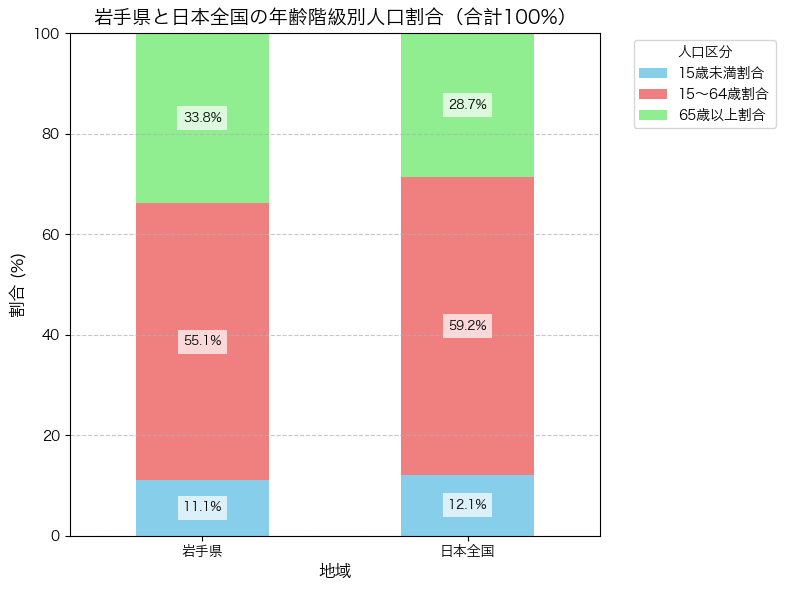

In [12]:
# import matplotlib.font_manager as fm # 日本語フォント設定のため

# # --- 日本語フォントの設定 ---
# # matplotlibで日本語を正しく表示するための設定です。
# # ご自身のPC環境に合った日本語フォントを適切に設定してください。
# # 設定がうまくいかない場合、グラフのタイトルやラベルが文字化けする可能性があります。
# try:
#     # 多くの環境で利用可能なIPAexGothicを試行します。
#     # インストールされていない場合は他のフォントを試すか、フォントファイルを指定してください。
#     plt.rcParams['font.family'] = 'IPAexGothic'
#     # 例: Macの場合のフォントパス指定（コメントアウトを外して使用）
#     # font_path = '/System/Library/Fonts/AppleGothic.ttf'
#     # font_prop = fm.FontProperties(fname=font_path)
#     # plt.rcParams['font.family'] = font_prop.get_name()
# except Exception as e:
#     print(f"日本語フォントの設定に失敗しました: {e}")
#     print("グラフの日本語が正しく表示されない可能性があります。")
#     print("ご自身の環境に合わせて matplotlib の日本語フォント設定を見直してください。")
#     # フォールバックとして、文字化けしにくいとされているフォントを指定
#     plt.rcParams['font.family'] = 'DejaVu Sans'

# # 負の符号（マイナス記号）が四角になるのを防ぐ設定
# plt.rcParams['axes.unicode_minus'] = False

# --- 人口データ ---
# 岩手県と日本全国の総人口および年齢階級別人口のデータです。
data = {
    '地域': ['岩手県', '日本全国'],
    '総人口': [1195622, 123214261],
    '15歳未満人口': [132447, 14955692],
    '15～64歳人口': [658816, 72922764],
    '65歳以上人口': [404359, 35335805]
}

# DataFrameの作成
df_pop = pd.DataFrame(data)

# --- 各年齢層の総人口に対する割合を計算 ---
df_pop['15歳未満割合'] = (df_pop['15歳未満人口'] / df_pop['総人口']) * 100
df_pop['15～64歳割合'] = (df_pop['15～64歳人口'] / df_pop['総人口']) * 100
df_pop['65歳以上割合'] = (df_pop['65歳以上人口'] / df_pop['総人口']) * 100

# 割合のデータだけを抽出したDataFrameをグラフ描画用に整形
# '地域'列をインデックスに設定すると、グラフ描画がしやすくなります。
df_proportions = df_pop[['地域', '15歳未満割合', '15～64歳割合', '65歳以上割合']].set_index('地域')

# --- グラフの作成 ---
fig, ax = plt.subplots(figsize=(8, 6)) # グラフの全体サイズを設定

# 積み上げ棒グラフを描画
df_proportions.plot(kind='bar', stacked=True, ax=ax,
                    color=['skyblue', 'lightcoral', 'lightgreen'])

# グラフのラベルとタイトルを設定
ax.set_xlabel('地域', fontsize=12)
ax.set_ylabel('割合 (%)', fontsize=12)
ax.set_title('岩手県と日本全国の年齢階級別人口割合（合計100%）', fontsize=14)

# X軸の目盛りを設定（岩手県、日本全国のラベルを表示）
ax.set_xticks(range(len(df_proportions.index)))
ax.set_xticklabels(df_proportions.index, rotation=0) # ラベルを水平に表示

# Y軸を0%から100%に固定
ax.set_ylim(0, 100)

# 凡例を表示（各棒が何を表しているか）
# 凡例をグラフの外に配置することで、グラフ本体との重なりを防ぎます。
ax.legend(title='人口区分', bbox_to_anchor=(1.05, 1), loc='upper left')

# 各棒のセグメントに割合の数値を表示
# 各年齢層の割合を棒グラフの中に直接表示します。
for container in ax.containers:
    for i, patch in enumerate(container.patches):
        # 棒の高さが0でない場合のみラベルを表示
        if patch.get_height() > 0:
            # 棒の中心X座標とY座標（上端）を取得し、ラベルを配置
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_y() + patch.get_height() / 2 # 各セグメントの中央に配置
            ax.text(x, y, f'{patch.get_height():.1f}%', # 少数第1位まで表示
                    ha='center', va='center', color='black', fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')) # 背景に白いボックスをつけて見やすくする

# Y軸にグリッド線を追加し、見やすくする
ax.grid(axis='y', linestyle='--', alpha=0.7)

# レイアウトを自動調整し、ラベルなどがグラフの範囲内に収まるようにする
plt.tight_layout()

# グラフを画像ファイルとして保存
file_name = '岩手県と日本全国の人口割合積み上げグラフ.png'
plt.savefig(file_name)

print(f"グラフを作成し、'{file_name}' として保存しました。")